# Model Comparison Summary

This notebook compares all trained models and generates summary tables and figures for the manuscript.

**Models Compared**:
- **Multiclass Classification** (18 fault classes):
  - XGBoost
  - LSTM
  - LSTM-FCN
  - CNN-Transformer
  - TransKal (Transformer + Kalman Filter)
  
- **Binary Anomaly Detection** (normal vs fault):
  - LSTM Autoencoder
  - Convolutional Autoencoder

**Outputs**:
- Summary tables: `outputs/metrics/model_comparison_*.csv`
- Comparison figures: `outputs/figures/model_comparison_*.png`

## Configuration

In [1]:
import os
import json
from pathlib import Path

print("="*60)
print("Model Comparison Summary")
print("="*60)

# Quick mode configuration
QUICK_MODE = os.getenv('QUICK_MODE', 'False').lower() in ('true', '1', 'yes')
MODE_SUFFIX = '_quick' if QUICK_MODE else ''

if QUICK_MODE:
    print("🚀 QUICK MODE - Loading quick mode metrics")
else:
    print("🔬 FULL MODE - Loading full training metrics")

# Paths
OUTPUT_DIR = Path('../outputs')
METRICS_DIR = OUTPUT_DIR / 'metrics'
FIGURES_DIR = OUTPUT_DIR / 'figures'

# Model definitions
MULTICLASS_MODELS = ['xgboost', 'lstm', 'lstm_fcn', 'cnn_transformer', 'transkal']
BINARY_MODELS = ['lstm_autoencoder', 'conv_autoencoder']

MODEL_DISPLAY_NAMES = {
    'xgboost': 'XGBoost',
    'lstm': 'LSTM',
    'lstm_fcn': 'LSTM-FCN',
    'cnn_transformer': 'CNN-Transformer',
    'transkal': 'TransKal',
    'lstm_autoencoder': 'LSTM-AE',
    'conv_autoencoder': 'Conv-AE'
}

Model Comparison Summary
🔬 FULL MODE - Loading full training metrics


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("✓ Imports successful")

✓ Imports successful


## Load Metrics

In [3]:
print("\nLoading multiclass model metrics...")

multiclass_metrics = {}
for model in MULTICLASS_MODELS:
    metrics_file = METRICS_DIR / f'{model}_metrics{MODE_SUFFIX}.json'
    if metrics_file.exists():
        with open(metrics_file) as f:
            multiclass_metrics[model] = json.load(f)
        print(f"  ✓ Loaded {model}")
    else:
        print(f"  ✗ Missing {model} (file: {metrics_file})")

print(f"\nLoaded {len(multiclass_metrics)}/{len(MULTICLASS_MODELS)} multiclass models")


Loading multiclass model metrics...
  ✓ Loaded xgboost
  ✓ Loaded lstm
  ✓ Loaded lstm_fcn
  ✓ Loaded cnn_transformer
  ✓ Loaded transkal

Loaded 5/5 multiclass models


In [4]:
print("\nLoading binary model metrics...")

binary_metrics = {}
for model in BINARY_MODELS:
    metrics_file = METRICS_DIR / f'{model}_metrics{MODE_SUFFIX}.json'
    if metrics_file.exists():
        with open(metrics_file) as f:
            binary_metrics[model] = json.load(f)
        print(f"  ✓ Loaded {model}")
    else:
        print(f"  ✗ Missing {model} (file: {metrics_file})")

print(f"\nLoaded {len(binary_metrics)}/{len(BINARY_MODELS)} binary models")


Loading binary model metrics...
  ✓ Loaded lstm_autoencoder
  ✓ Loaded conv_autoencoder

Loaded 2/2 binary models


## Multiclass Classification Results

In [5]:
print("\n" + "="*60)
print("MULTICLASS CLASSIFICATION RESULTS")
print("="*60)

# Build comparison table
rows = []
for model in MULTICLASS_MODELS:
    if model not in multiclass_metrics:
        continue
    m = multiclass_metrics[model]
    rows.append({
        'Model': MODEL_DISPLAY_NAMES[model],
        'Accuracy': m['accuracy'],
        'Balanced Acc': m['balanced_accuracy'],
        'F1 (Weighted)': m['f1_weighted'],
        'F1 (Macro)': m['f1_macro'],
        'Precision': m['precision_weighted'],
        'Recall': m['recall_weighted'],
        'Training Time (s)': m.get('training_time_seconds', 0)
    })

multiclass_df = pd.DataFrame(rows)
multiclass_df = multiclass_df.set_index('Model')

# Format for display
display_df = multiclass_df.copy()
for col in ['Accuracy', 'Balanced Acc', 'F1 (Weighted)', 'F1 (Macro)', 'Precision', 'Recall']:
    display_df[col] = display_df[col].apply(lambda x: f"{x:.4f}")
display_df['Training Time (s)'] = display_df['Training Time (s)'].apply(lambda x: f"{x:.1f}")

print("\n" + display_df.to_string())

# Save to CSV
output_file = METRICS_DIR / f'model_comparison_multiclass{MODE_SUFFIX}.csv'
multiclass_df.to_csv(output_file)
print(f"\n✓ Saved to {output_file}")


MULTICLASS CLASSIFICATION RESULTS

                Accuracy Balanced Acc F1 (Weighted) F1 (Macro) Precision  Recall Training Time (s)
Model                                                                                             
XGBoost           0.9391       0.9391        0.9416     0.9416    0.9484  0.9391            2399.5
LSTM              0.9914       0.9914        0.9914     0.9914    0.9917  0.9914            1204.9
LSTM-FCN          0.9937       0.9937        0.9937     0.9937    0.9938  0.9937            1574.0
CNN-Transformer   0.9920       0.9920        0.9920     0.9920    0.9921  0.9920            4053.3
TransKal          0.9909       0.9909        0.9909     0.9909    0.9910  0.9909            1913.8

✓ Saved to ../outputs/metrics/model_comparison_multiclass.csv


In [6]:
# Highlight best model for each metric
print("\nBest Model by Metric:")
print("-" * 40)
for col in ['Accuracy', 'Balanced Acc', 'F1 (Weighted)', 'F1 (Macro)', 'Precision', 'Recall']:
    best_model = multiclass_df[col].idxmax()
    best_value = multiclass_df[col].max()
    print(f"  {col}: {best_model} ({best_value:.4f})")


Best Model by Metric:
----------------------------------------
  Accuracy: LSTM-FCN (0.9937)
  Balanced Acc: LSTM-FCN (0.9937)
  F1 (Weighted): LSTM-FCN (0.9937)
  F1 (Macro): LSTM-FCN (0.9937)
  Precision: LSTM-FCN (0.9938)
  Recall: LSTM-FCN (0.9937)


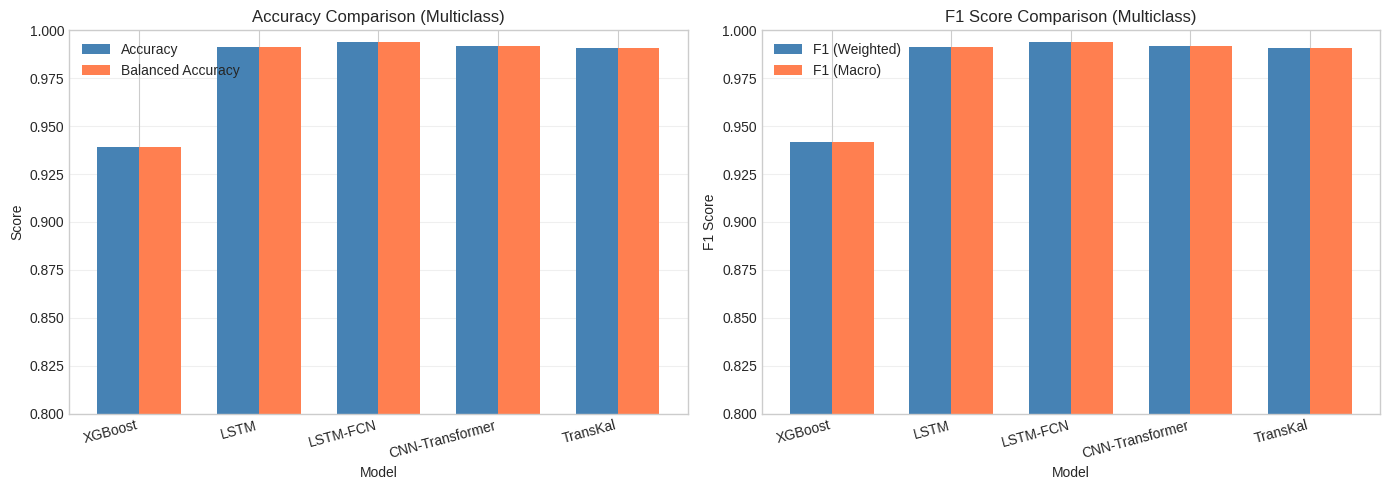

✓ Saved to ../outputs/figures/model_comparison_multiclass_bars.png


In [7]:
# Bar chart comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
models = multiclass_df.index.tolist()
x = np.arange(len(models))
width = 0.35

ax = axes[0]
bars1 = ax.bar(x - width/2, multiclass_df['Accuracy'], width, label='Accuracy', color='steelblue')
bars2 = ax.bar(x + width/2, multiclass_df['Balanced Acc'], width, label='Balanced Accuracy', color='coral')
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title(f'Accuracy Comparison (Multiclass){" - QUICK" if QUICK_MODE else ""}')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right')
ax.legend()
ax.set_ylim(0.8, 1.0)
ax.grid(axis='y', alpha=0.3)

# F1 comparison
ax = axes[1]
bars1 = ax.bar(x - width/2, multiclass_df['F1 (Weighted)'], width, label='F1 (Weighted)', color='steelblue')
bars2 = ax.bar(x + width/2, multiclass_df['F1 (Macro)'], width, label='F1 (Macro)', color='coral')
ax.set_xlabel('Model')
ax.set_ylabel('F1 Score')
ax.set_title(f'F1 Score Comparison (Multiclass){" - QUICK" if QUICK_MODE else ""}')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right')
ax.legend()
ax.set_ylim(0.8, 1.0)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
output_file = FIGURES_DIR / f'model_comparison_multiclass_bars{MODE_SUFFIX}.png'
plt.savefig(output_file, dpi=150, bbox_inches='tight')
plt.show()
print(f"✓ Saved to {output_file}")

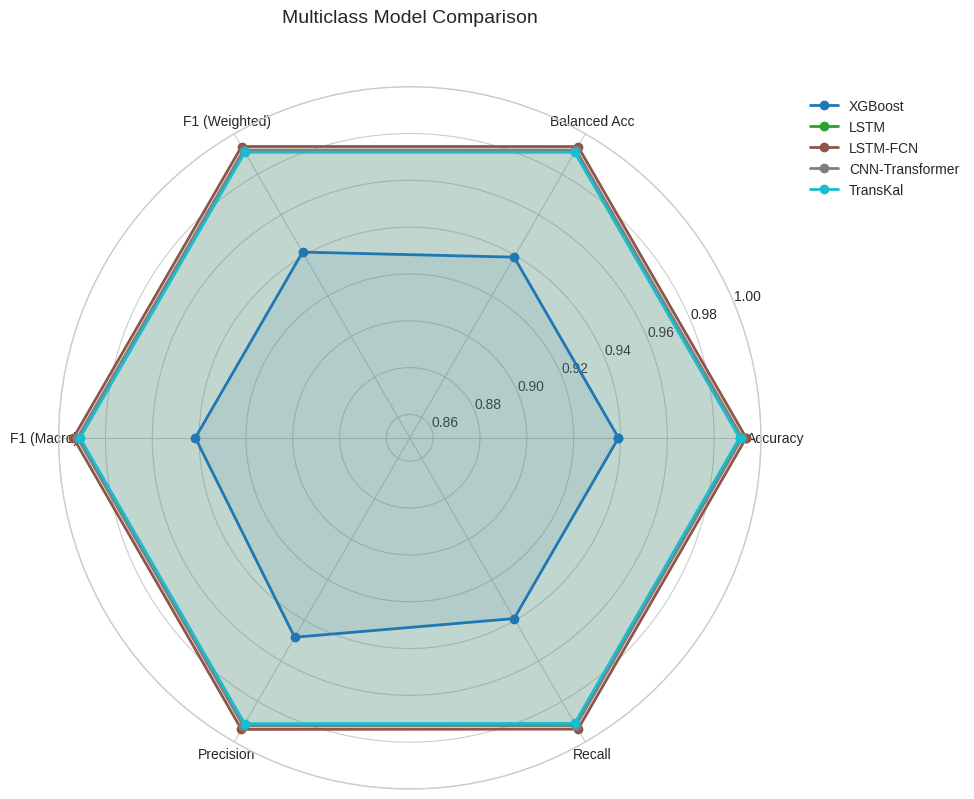

✓ Saved to ../outputs/figures/model_comparison_multiclass_radar.png


In [8]:
# Radar chart
from math import pi

metrics_cols = ['Accuracy', 'Balanced Acc', 'F1 (Weighted)', 'F1 (Macro)', 'Precision', 'Recall']
N = len(metrics_cols)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

colors = plt.cm.tab10(np.linspace(0, 1, len(multiclass_df)))

for idx, (model, row) in enumerate(multiclass_df.iterrows()):
    values = [row[col] for col in metrics_cols]
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, 'o-', linewidth=2, label=model, color=colors[idx])
    ax.fill(angles, values, alpha=0.1, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics_cols)
ax.set_ylim(0.85, 1.0)
ax.set_title(f'Multiclass Model Comparison{" - QUICK" if QUICK_MODE else ""}', size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
output_file = FIGURES_DIR / f'model_comparison_multiclass_radar{MODE_SUFFIX}.png'
plt.savefig(output_file, dpi=150, bbox_inches='tight')
plt.show()
print(f"✓ Saved to {output_file}")

## Per-Class F1 Score Comparison


Per-Class F1 Scores:


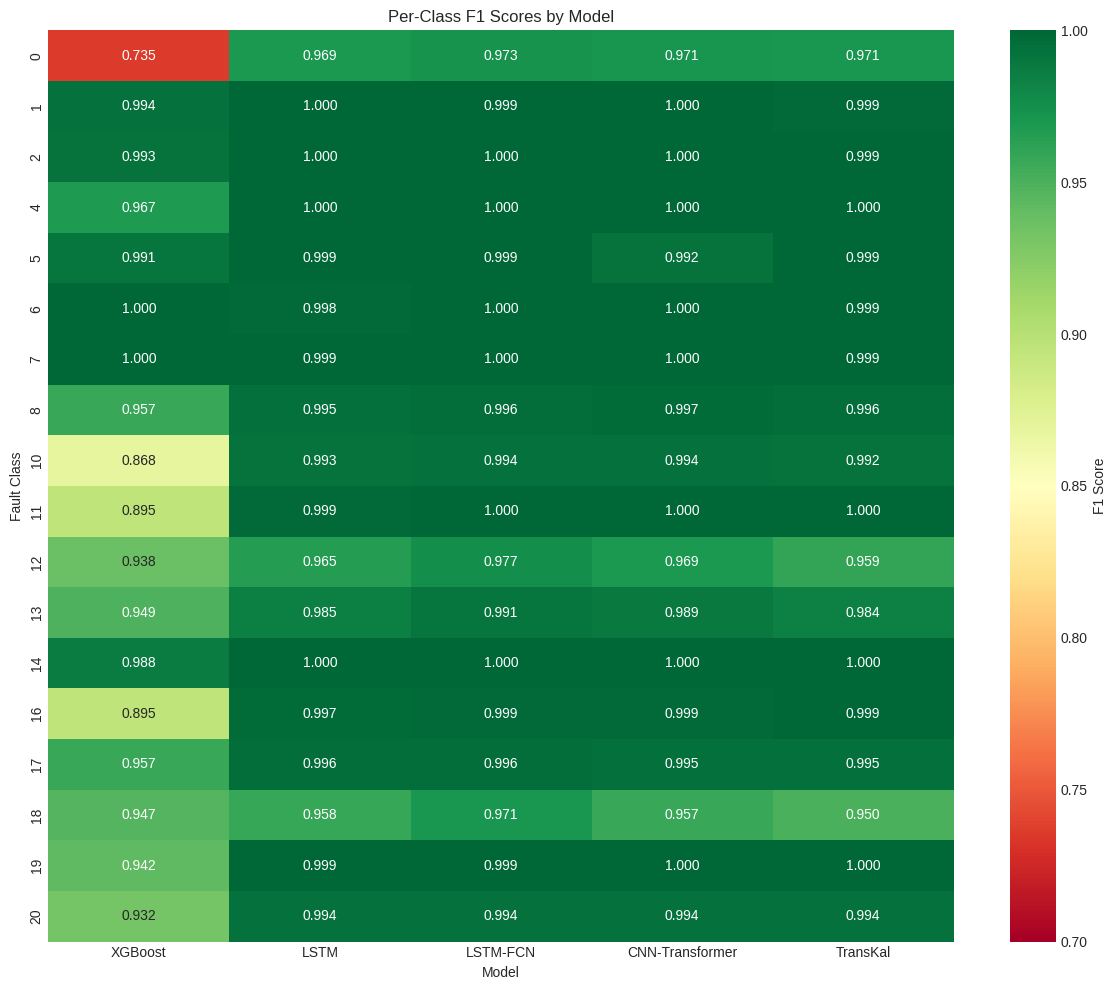

✓ Saved to ../outputs/figures/model_comparison_perclass_f1_heatmap.png
✓ Saved to ../outputs/metrics/model_comparison_perclass_f1.csv


In [9]:
# Extract per-class F1 scores
print("\nPer-Class F1 Scores:")

perclass_data = {}
for model in MULTICLASS_MODELS:
    if model not in multiclass_metrics:
        continue
    m = multiclass_metrics[model]
    if 'per_class_f1' in m:
        perclass_data[MODEL_DISPLAY_NAMES[model]] = m['per_class_f1']

if perclass_data:
    perclass_df = pd.DataFrame(perclass_data)
    perclass_df.index.name = 'Fault Class'
    
    # Heatmap
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(perclass_df, annot=True, fmt='.3f', cmap='RdYlGn', 
                vmin=0.7, vmax=1.0, ax=ax, cbar_kws={'label': 'F1 Score'})
    ax.set_xlabel('Model')
    ax.set_ylabel('Fault Class')
    ax.set_title(f'Per-Class F1 Scores by Model{" - QUICK" if QUICK_MODE else ""}')
    plt.tight_layout()
    output_file = FIGURES_DIR / f'model_comparison_perclass_f1_heatmap{MODE_SUFFIX}.png'
    plt.savefig(output_file, dpi=150, bbox_inches='tight')
    plt.show()
    print(f"✓ Saved to {output_file}")
    
    # Save to CSV
    csv_file = METRICS_DIR / f'model_comparison_perclass_f1{MODE_SUFFIX}.csv'
    perclass_df.to_csv(csv_file)
    print(f"✓ Saved to {csv_file}")
else:
    print("No per-class F1 data available")

In [10]:
# Identify difficult classes
if perclass_data:
    print("\nMost Difficult Classes (lowest average F1):")
    avg_f1 = perclass_df.mean(axis=1).sort_values()
    print(avg_f1.head(5).to_string())
    
    print("\n\nEasiest Classes (highest average F1):")
    print(avg_f1.tail(5).to_string())


Most Difficult Classes (lowest average F1):
Fault Class
0     0.923819
18    0.956738
12    0.961499
10    0.968098
16    0.977647


Easiest Classes (highest average F1):
Fault Class
14    0.997566
2     0.998168
1     0.998229
6     0.999470
7     0.999643


## Binary Anomaly Detection Results

In [11]:
print("\n" + "="*60)
print("BINARY ANOMALY DETECTION RESULTS")
print("="*60)

# Build comparison table
rows = []
for model in BINARY_MODELS:
    if model not in binary_metrics:
        continue
    m = binary_metrics[model]
    rows.append({
        'Model': MODEL_DISPLAY_NAMES[model],
        'Accuracy': m['accuracy'],
        'Balanced Acc': m['balanced_accuracy'],
        'F1 (Weighted)': m['f1_weighted'],
        'F1 (Binary)': m['f1_binary'],
        'Precision': m['precision'],
        'Recall': m['recall'],
        'ROC-AUC': m['roc_auc'],
        'PR-AUC': m['pr_auc'],
        'Training Time (s)': m.get('training_time_seconds', 0)
    })

if rows:
    binary_df = pd.DataFrame(rows)
    binary_df = binary_df.set_index('Model')
    
    # Format for display
    display_df = binary_df.copy()
    for col in ['Accuracy', 'Balanced Acc', 'F1 (Weighted)', 'F1 (Binary)', 'Precision', 'Recall', 'ROC-AUC', 'PR-AUC']:
        display_df[col] = display_df[col].apply(lambda x: f"{x:.4f}")
    display_df['Training Time (s)'] = display_df['Training Time (s)'].apply(lambda x: f"{x:.1f}")
    
    print("\n" + display_df.to_string())
    
    # Save to CSV
    output_file = METRICS_DIR / f'model_comparison_binary{MODE_SUFFIX}.csv'
    binary_df.to_csv(output_file)
    print(f"\n✓ Saved to {output_file}")
else:
    print("No binary model metrics available")


BINARY ANOMALY DETECTION RESULTS

        Accuracy Balanced Acc F1 (Weighted) F1 (Binary) Precision  Recall ROC-AUC  PR-AUC Training Time (s)
Model                                                                                                      
LSTM-AE   0.9696       0.9716        0.9705      0.9820    0.9955  0.9688  0.9925  0.9988             707.2
Conv-AE   0.9939       0.9863        0.9939      0.9964    0.9958  0.9970  0.9988  0.9998              56.5

✓ Saved to ../outputs/metrics/model_comparison_binary.csv


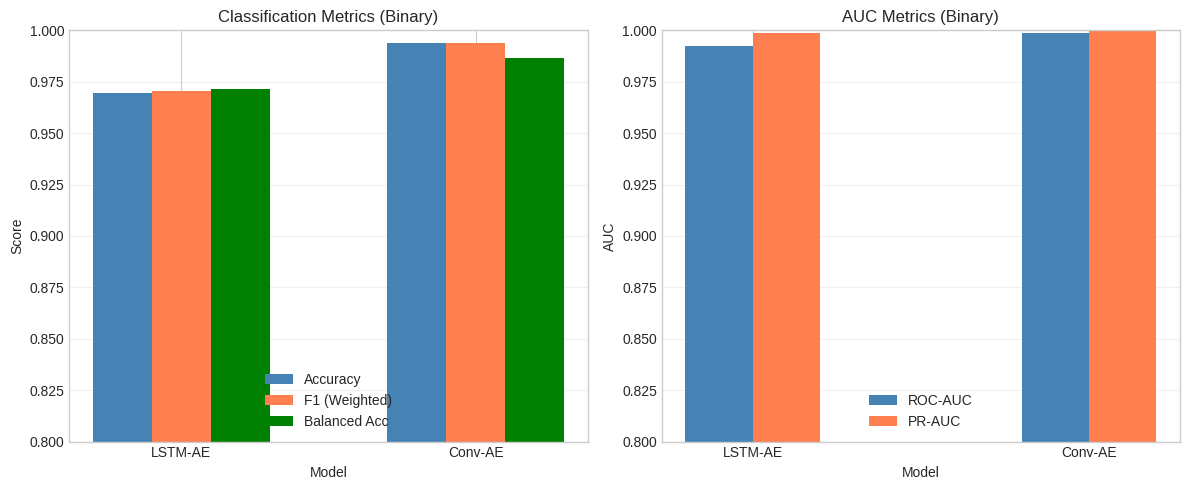

✓ Saved to ../outputs/figures/model_comparison_binary_bars.png


In [12]:
if rows:
    # Bar chart comparison
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    models = binary_df.index.tolist()
    x = np.arange(len(models))
    width = 0.2
    
    # Classification metrics
    ax = axes[0]
    bars1 = ax.bar(x - width, binary_df['Accuracy'], width, label='Accuracy', color='steelblue')
    bars2 = ax.bar(x, binary_df['F1 (Weighted)'], width, label='F1 (Weighted)', color='coral')
    bars3 = ax.bar(x + width, binary_df['Balanced Acc'], width, label='Balanced Acc', color='green')
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    ax.set_title(f'Classification Metrics (Binary){" - QUICK" if QUICK_MODE else ""}')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()
    ax.set_ylim(0.8, 1.0)
    ax.grid(axis='y', alpha=0.3)
    
    # AUC metrics
    ax = axes[1]
    bars1 = ax.bar(x - width/2, binary_df['ROC-AUC'], width, label='ROC-AUC', color='steelblue')
    bars2 = ax.bar(x + width/2, binary_df['PR-AUC'], width, label='PR-AUC', color='coral')
    ax.set_xlabel('Model')
    ax.set_ylabel('AUC')
    ax.set_title(f'AUC Metrics (Binary){" - QUICK" if QUICK_MODE else ""}')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.legend()
    ax.set_ylim(0.8, 1.0)
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    output_file = FIGURES_DIR / f'model_comparison_binary_bars{MODE_SUFFIX}.png'
    plt.savefig(output_file, dpi=150, bbox_inches='tight')
    plt.show()
    print(f"✓ Saved to {output_file}")

## Combined Summary

In [13]:
print("\n" + "="*60)
print("COMBINED MODEL SUMMARY")
print("="*60)

# Build unified summary
rows = []

# Multiclass models
for model in MULTICLASS_MODELS:
    if model not in multiclass_metrics:
        continue
    m = multiclass_metrics[model]
    rows.append({
        'Model': MODEL_DISPLAY_NAMES[model],
        'Task': 'Multiclass',
        'Accuracy': m['accuracy'],
        'F1 (Weighted)': m['f1_weighted'],
        'Precision': m['precision_weighted'],
        'Recall': m['recall_weighted'],
        'Training Time (s)': m.get('training_time_seconds', 0)
    })

# Binary models
for model in BINARY_MODELS:
    if model not in binary_metrics:
        continue
    m = binary_metrics[model]
    rows.append({
        'Model': MODEL_DISPLAY_NAMES[model],
        'Task': 'Binary',
        'Accuracy': m['accuracy'],
        'F1 (Weighted)': m['f1_weighted'],
        'Precision': m['precision'],
        'Recall': m['recall'],
        'Training Time (s)': m.get('training_time_seconds', 0)
    })

combined_df = pd.DataFrame(rows)

# Format for display
display_df = combined_df.copy()
for col in ['Accuracy', 'F1 (Weighted)', 'Precision', 'Recall']:
    display_df[col] = display_df[col].apply(lambda x: f"{x:.4f}")
display_df['Training Time (s)'] = display_df['Training Time (s)'].apply(lambda x: f"{x:.1f}")

print("\n" + display_df.to_string(index=False))

# Save to CSV
output_file = METRICS_DIR / f'model_comparison_combined{MODE_SUFFIX}.csv'
combined_df.to_csv(output_file, index=False)
print(f"\n✓ Saved to {output_file}")


COMBINED MODEL SUMMARY

          Model       Task Accuracy F1 (Weighted) Precision Recall Training Time (s)
        XGBoost Multiclass   0.9391        0.9416    0.9484 0.9391            2399.5
           LSTM Multiclass   0.9914        0.9914    0.9917 0.9914            1204.9
       LSTM-FCN Multiclass   0.9937        0.9937    0.9938 0.9937            1574.0
CNN-Transformer Multiclass   0.9920        0.9920    0.9921 0.9920            4053.3
       TransKal Multiclass   0.9909        0.9909    0.9910 0.9909            1913.8
        LSTM-AE     Binary   0.9696        0.9705    0.9955 0.9688             707.2
        Conv-AE     Binary   0.9939        0.9939    0.9958 0.9970              56.5

✓ Saved to ../outputs/metrics/model_comparison_combined.csv


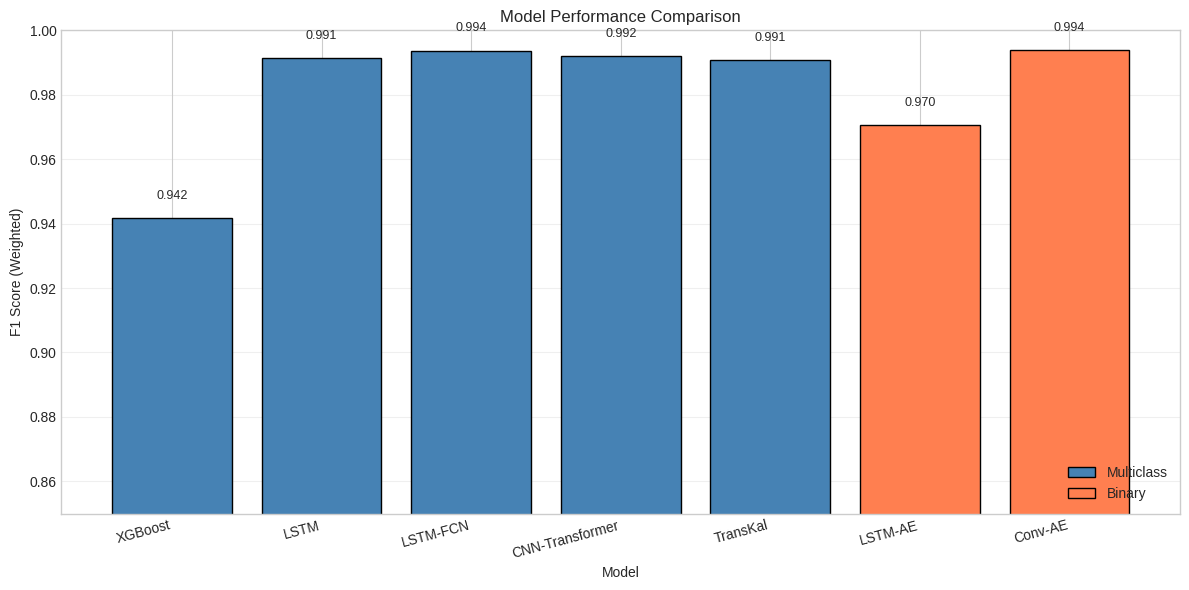

✓ Saved to ../outputs/figures/model_comparison_combined.png


In [14]:
# Combined visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Group by task
multiclass_models = combined_df[combined_df['Task'] == 'Multiclass']
binary_models = combined_df[combined_df['Task'] == 'Binary']

all_models = combined_df['Model'].tolist()
x = np.arange(len(all_models))
width = 0.35

# Color by task
colors = ['steelblue' if t == 'Multiclass' else 'coral' for t in combined_df['Task']]

bars = ax.bar(x, combined_df['F1 (Weighted)'], color=colors, edgecolor='black')

# Add value labels
for bar, val in zip(bars, combined_df['F1 (Weighted)']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
            f'{val:.3f}', ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Model')
ax.set_ylabel('F1 Score (Weighted)')
ax.set_title(f'Model Performance Comparison{" - QUICK" if QUICK_MODE else ""}')
ax.set_xticks(x)
ax.set_xticklabels(all_models, rotation=15, ha='right')
ax.set_ylim(0.85, 1.0)
ax.grid(axis='y', alpha=0.3)

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='steelblue', edgecolor='black', label='Multiclass'),
                   Patch(facecolor='coral', edgecolor='black', label='Binary')]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
output_file = FIGURES_DIR / f'model_comparison_combined{MODE_SUFFIX}.png'
plt.savefig(output_file, dpi=150, bbox_inches='tight')
plt.show()
print(f"✓ Saved to {output_file}")

## LaTeX Tables for Manuscript

In [15]:
print("\n" + "="*60)
print("LATEX TABLE: MULTICLASS RESULTS")
print("="*60)

if len(multiclass_metrics) > 0:
    latex_rows = []
    for model in MULTICLASS_MODELS:
        if model not in multiclass_metrics:
            continue
        m = multiclass_metrics[model]
        latex_rows.append(
            f"{MODEL_DISPLAY_NAMES[model]} & {m['accuracy']:.4f} & {m['balanced_accuracy']:.4f} & "
            f"{m['f1_weighted']:.4f} & {m['f1_macro']:.4f} & {m['precision_weighted']:.4f} & {m['recall_weighted']:.4f} \\\\"
        )
    
    latex_table = """\\begin{table}[htbp]
\\centering
\\caption{Multiclass Fault Classification Results}
\\label{tab:multiclass-results}
\\begin{tabular}{lcccccc}
\\toprule
Model & Accuracy & Balanced Acc & F1 (Weighted) & F1 (Macro) & Precision & Recall \\\\
\\midrule
""" + "\n".join(latex_rows) + """
\\bottomrule
\\end{tabular}
\\end{table}"""
    
    print(latex_table)
    
    # Save to file
    with open(METRICS_DIR / 'table_multiclass_results.tex', 'w') as f:
        f.write(latex_table)
    print(f"\n✓ Saved to {METRICS_DIR / 'table_multiclass_results.tex'}")


LATEX TABLE: MULTICLASS RESULTS
\begin{table}[htbp]
\centering
\caption{Multiclass Fault Classification Results}
\label{tab:multiclass-results}
\begin{tabular}{lcccccc}
\toprule
Model & Accuracy & Balanced Acc & F1 (Weighted) & F1 (Macro) & Precision & Recall \\
\midrule
XGBoost & 0.9391 & 0.9391 & 0.9416 & 0.9416 & 0.9484 & 0.9391 \\
LSTM & 0.9914 & 0.9914 & 0.9914 & 0.9914 & 0.9917 & 0.9914 \\
LSTM-FCN & 0.9937 & 0.9937 & 0.9937 & 0.9937 & 0.9938 & 0.9937 \\
CNN-Transformer & 0.9920 & 0.9920 & 0.9920 & 0.9920 & 0.9921 & 0.9920 \\
TransKal & 0.9909 & 0.9909 & 0.9909 & 0.9909 & 0.9910 & 0.9909 \\
\bottomrule
\end{tabular}
\end{table}

✓ Saved to ../outputs/metrics/table_multiclass_results.tex


In [16]:
print("\n" + "="*60)
print("LATEX TABLE: BINARY RESULTS")
print("="*60)

if len(binary_metrics) > 0:
    latex_rows = []
    for model in BINARY_MODELS:
        if model not in binary_metrics:
            continue
        m = binary_metrics[model]
        latex_rows.append(
            f"{MODEL_DISPLAY_NAMES[model]} & {m['accuracy']:.4f} & {m['f1_weighted']:.4f} & "
            f"{m['precision']:.4f} & {m['recall']:.4f} & {m['roc_auc']:.4f} & {m['pr_auc']:.4f} \\\\"
        )
    
    latex_table = """\\begin{table}[htbp]
\\centering
\\caption{Binary Anomaly Detection Results}
\\label{tab:binary-results}
\\begin{tabular}{lcccccc}
\\toprule
Model & Accuracy & F1 (Weighted) & Precision & Recall & ROC-AUC & PR-AUC \\\\
\\midrule
""" + "\n".join(latex_rows) + """
\\bottomrule
\\end{tabular}
\\end{table}"""
    
    print(latex_table)
    
    # Save to file
    with open(METRICS_DIR / 'table_binary_results.tex', 'w') as f:
        f.write(latex_table)
    print(f"\n✓ Saved to {METRICS_DIR / 'table_binary_results.tex'}")


LATEX TABLE: BINARY RESULTS
\begin{table}[htbp]
\centering
\caption{Binary Anomaly Detection Results}
\label{tab:binary-results}
\begin{tabular}{lcccccc}
\toprule
Model & Accuracy & F1 (Weighted) & Precision & Recall & ROC-AUC & PR-AUC \\
\midrule
LSTM-AE & 0.9696 & 0.9705 & 0.9955 & 0.9688 & 0.9925 & 0.9988 \\
Conv-AE & 0.9939 & 0.9939 & 0.9958 & 0.9970 & 0.9988 & 0.9998 \\
\bottomrule
\end{tabular}
\end{table}

✓ Saved to ../outputs/metrics/table_binary_results.tex


## Key Findings Summary

In [17]:
print("\n" + "="*60)
print("KEY FINDINGS")
print("="*60)

print("\n### Multiclass Fault Classification ###")
if len(multiclass_metrics) > 0:
    best_acc_model = max(multiclass_metrics.items(), key=lambda x: x[1]['accuracy'])
    best_f1_model = max(multiclass_metrics.items(), key=lambda x: x[1]['f1_weighted'])
    
    print(f"\nBest Accuracy: {MODEL_DISPLAY_NAMES[best_acc_model[0]]} ({best_acc_model[1]['accuracy']:.4f})")
    print(f"Best F1 (Weighted): {MODEL_DISPLAY_NAMES[best_f1_model[0]]} ({best_f1_model[1]['f1_weighted']:.4f})")
    
    # Range of performance
    accs = [m['accuracy'] for m in multiclass_metrics.values()]
    f1s = [m['f1_weighted'] for m in multiclass_metrics.values()]
    print(f"\nAccuracy range: {min(accs):.4f} - {max(accs):.4f}")
    print(f"F1 (Weighted) range: {min(f1s):.4f} - {max(f1s):.4f}")

print("\n### Binary Anomaly Detection ###")
if len(binary_metrics) > 0:
    best_f1_model = max(binary_metrics.items(), key=lambda x: x[1]['f1_weighted'])
    best_auc_model = max(binary_metrics.items(), key=lambda x: x[1]['roc_auc'])
    
    print(f"\nBest F1 (Weighted): {MODEL_DISPLAY_NAMES[best_f1_model[0]]} ({best_f1_model[1]['f1_weighted']:.4f})")
    print(f"Best ROC-AUC: {MODEL_DISPLAY_NAMES[best_auc_model[0]]} ({best_auc_model[1]['roc_auc']:.4f})")

print("\n" + "="*60)
print("✓ Model Comparison Summary Complete!")
print("="*60)


KEY FINDINGS

### Multiclass Fault Classification ###

Best Accuracy: LSTM-FCN (0.9937)
Best F1 (Weighted): LSTM-FCN (0.9937)

Accuracy range: 0.9391 - 0.9937
F1 (Weighted) range: 0.9416 - 0.9937

### Binary Anomaly Detection ###

Best F1 (Weighted): Conv-AE (0.9939)
Best ROC-AUC: Conv-AE (0.9988)

✓ Model Comparison Summary Complete!
